In [152]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb
sb.set_style('whitegrid')

%matplotlib inline
rcParams['figure.figsize'] = 10,4
rcParams["figure.autolayout"] = True
from datetime import datetime

In [61]:
address = 'C:/Users\king\Python Data Scientist\owid-covid-data.csv'
covid = pd.read_csv(address)
covid


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93732,ZWE,Africa,Zimbabwe,2021-06-01,38998.0,37.0,41.714,1599.0,5.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93733,ZWE,Africa,Zimbabwe,2021-06-02,39031.0,33.0,30.286,1599.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93734,ZWE,Africa,Zimbabwe,2021-06-03,39092.0,61.0,34.000,1604.0,5.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
93735,ZWE,Africa,Zimbabwe,2021-06-04,39144.0,52.0,32.286,1605.0,1.0,1.857,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [88]:
df_transform = pd.DataFrame (covid, columns = ['total_deaths','total_cases'])
df_transform = df_transform.dropna()
df_transform



,total_deaths,total_cases
27,1.0,34.0
28,1.0,41.0
29,1.0,43.0
30,2.0,76.0
31,3.0,80.0
...,...,...
93732,1599.0,38998.0
93733,1599.0,39031.0
93734,1604.0,39092.0
93735,1605.0,39144.0


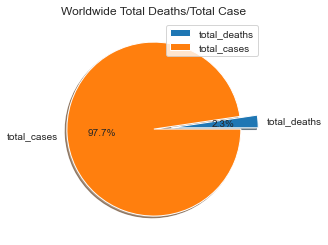

In [106]:
df_transfrom = df_transform.sum()
veh_type = ['total_deaths','total_cases']
my_explodes = [0.2,0]
plt.pie(df_transfrom, labels = veh_type, explode = my_explodes, shadow= True, autopct='%1.1f%%')
plt.legend()
plt.title('Worldwide Total Deaths/Total Case')
plt.show()


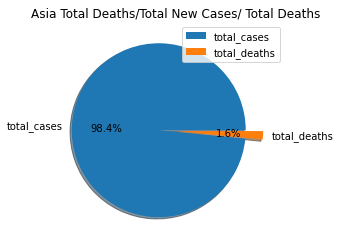

In [91]:
df_asia = pd.DataFrame(covid,columns = ['total_cases','total_deaths','continent'])
df_asia = df_asia.dropna()
df_asia = df_asia[df_asia.continent == 'Asia']
df_asia = pd.DataFrame(df_asia,columns =['total_cases','total_deaths'])
df_asia = df_asia.sum()
veh_type = ['total_cases','total_deaths']
my_explodes = [0.2,0]
plt.pie(df_asia, labels = veh_type, explode = my_explodes, shadow= True, autopct='%1.1f%%')
plt.legend()
plt.title('Asia Total Deaths/Total New Cases/ Total Deaths')
plt.show()


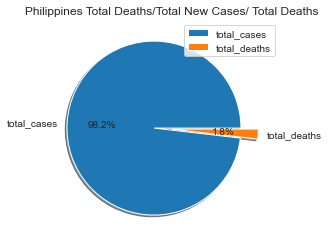

In [107]:
##Philipines

df_ph = pd.DataFrame(covid,columns = ['total_cases','total_deaths','location'])
df_ph = df_ph.dropna()
df_ph = df_ph[df_ph.location == 'Philippines']
df_ph = pd.DataFrame(df_ph,columns =['total_cases','total_deaths'])
df_ph = df_ph.sum()
veh_type = ['total_cases','total_deaths']
my_explodes = [0.2,0,]
plt.pie(df_ph, labels = veh_type, explode = my_explodes, shadow= True, autopct='%1.1f%%')
plt.legend()
plt.title('Philippines Total Deaths/Total New Cases/ Total Deaths')
plt.show()



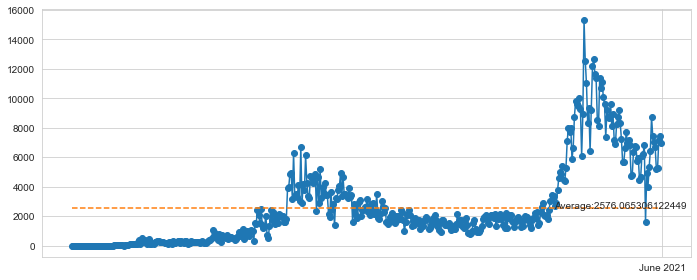

In [200]:
df_ph_ts = pd.DataFrame(covid,columns = ['new_cases','date','location','new_deaths'])
df_ph_ts = df_ph_ts.dropna()
df_ph_ts = df_ph_ts[df_ph_ts.location == 'Philippines']
df_ph_ts = pd.DataFrame(df_ph_ts,columns =['new_cases','date','new_deaths'])
x_tick_labels = ['June 2021']
x = np.array(df_ph_ts.date)
y = np.array(df_ph_ts.new_cases)
y_mean = [np.mean(y)]*len(x)
fig, ax= plt.subplots()
data_line = ax.plot(x,y,label = 'Covid New Cases Per Day',marker = 'o')
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
ax.set_xticks(x_tick_labels)
ax.annotate('Average:' + str(y_mean[0]) ,xy =(40,2500),xytext=(400,2500))
plt.show()



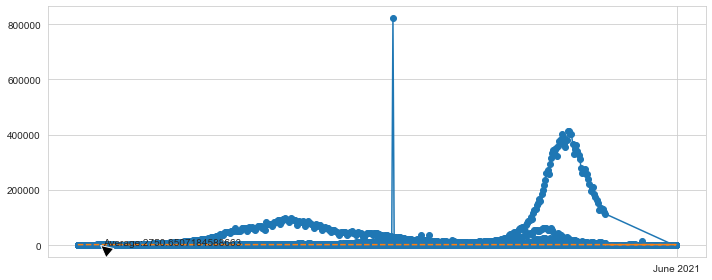

In [181]:
df_ph_ts = pd.DataFrame(covid,columns = ['new_cases','date','continent','new_deaths'])
df_ph_ts = df_ph_ts.dropna()
df_ph_ts = df_ph_ts[df_ph_ts.continent == 'Asia']
df_ph_ts = pd.DataFrame(df_ph_ts,columns =['new_cases','date','new_deaths'])
x_tick_labels = ['June 2021']
x = np.array(df_ph_ts.date)
y = np.array(df_ph_ts.new_cases)
y_mean = [np.mean(y)]*len(x)
fig, ax= plt.subplots()
data_line = ax.plot(x,y,label = 'Covid New Cases Per Day',marker = 'o')
mean_line = ax.plot(x,y_mean, label='Mean', linestyle='--')
ax.set_xticks(x_tick_labels)
ax.annotate('Average:' + str(y_mean[0]) ,xy =(19,33.9),xytext=(21,35),
            arrowprops = dict(facecolor = 'black',shrink =0.05))
plt.show()


